# 1. Image Compression Using K Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

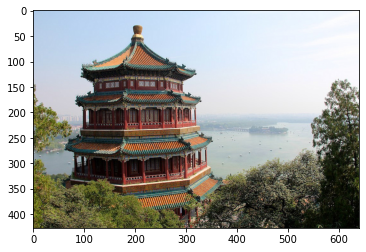

In [2]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
plt.imshow(china)

### 1.2 Scalling

In [3]:
china_flatten = china / 255.0
china_flatten = china_flatten.reshape(-1, 3)
china_flatten.shape

(273280, 3)

### 1.3 EDA

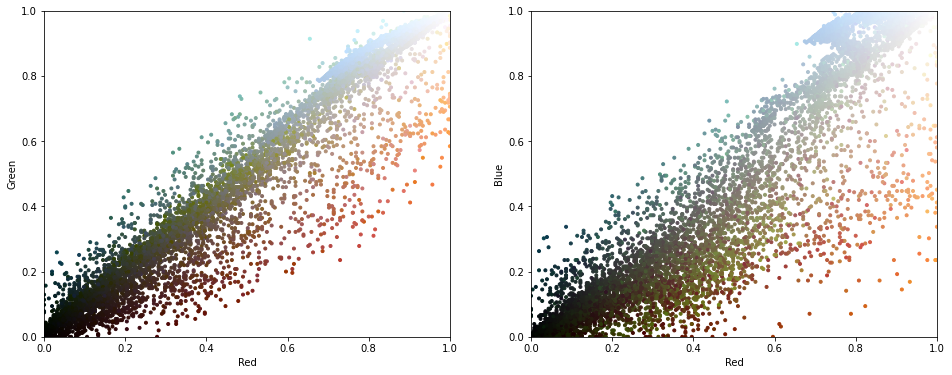

In [4]:
def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
plot_pixels(china_flatten)    

# 2. K-Means

### 2.1 Learning

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)
kmeans.fit(china_flatten)

KMeans(n_clusters=16)

### 2.2 New Color

In [6]:
kmeans.cluster_centers_

array([[0.94834798, 0.96247162, 0.98636679],
       [0.21496332, 0.21757057, 0.17009833],
       [0.68561694, 0.40188191, 0.28946422],
       [0.75121864, 0.83982052, 0.94002195],
       [0.54488311, 0.53914842, 0.44087871],
       [0.05245807, 0.04932344, 0.0268878 ],
       [0.7124512 , 0.75101009, 0.74176412],
       [0.45332382, 0.42668884, 0.21522993],
       [0.31785818, 0.31757365, 0.26266365],
       [0.868242  , 0.91430636, 0.96570629],
       [0.14931443, 0.12299903, 0.08957283],
       [0.80443603, 0.82471457, 0.84420005],
       [0.8592568 , 0.62305747, 0.45741164],
       [0.37079964, 0.24580643, 0.12426183],
       [0.41906555, 0.42719884, 0.37759175],
       [0.59441439, 0.63654087, 0.62143432]])

### 2.3 Conversion

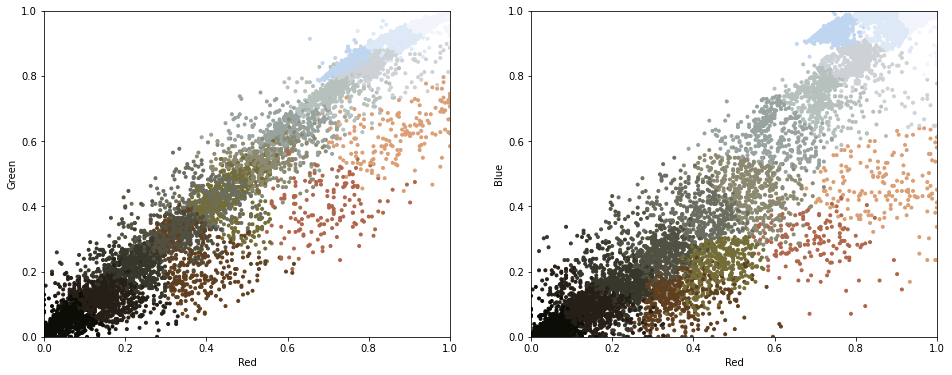

In [7]:
new_color_label = kmeans.predict(china_flatten)
new_colors = kmeans.cluster_centers_[new_color_label]

plot_pixels(china_flatten, colors=new_colors)

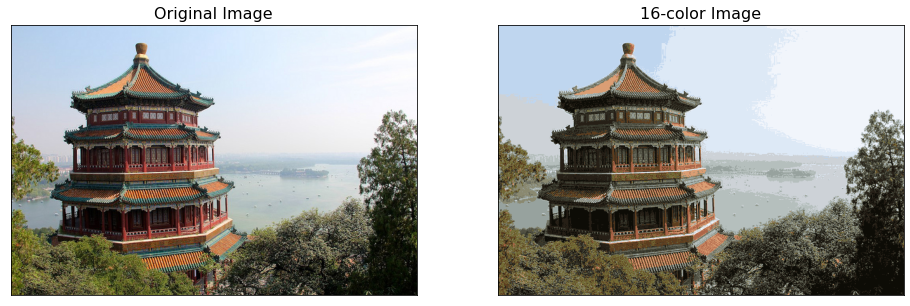

In [8]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16);

# 3. Smaller K

### 3.1 Learning

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(china_flatten)

KMeans()

### 3.2 New Color

In [10]:
kmeans.cluster_centers_

array([[0.91784501, 0.94362437, 0.9771701 ],
       [0.4031857 , 0.36151607, 0.24216926],
       [0.08544226, 0.07503215, 0.0497163 ],
       [0.67250969, 0.70747648, 0.69441231],
       [0.51587483, 0.51372149, 0.42540336],
       [0.23663269, 0.2093788 , 0.15283096],
       [0.77676248, 0.83687279, 0.9018911 ],
       [0.81332866, 0.56553373, 0.40760157]])

### 3.3 Conversion

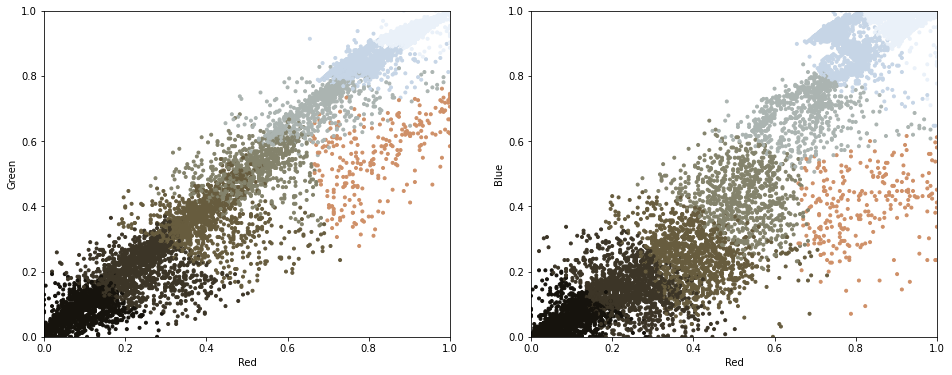

In [11]:
new_color_label = kmeans.predict(china_flatten)
new_colors = kmeans.cluster_centers_[new_color_label]

plot_pixels(china_flatten, colors=new_colors)

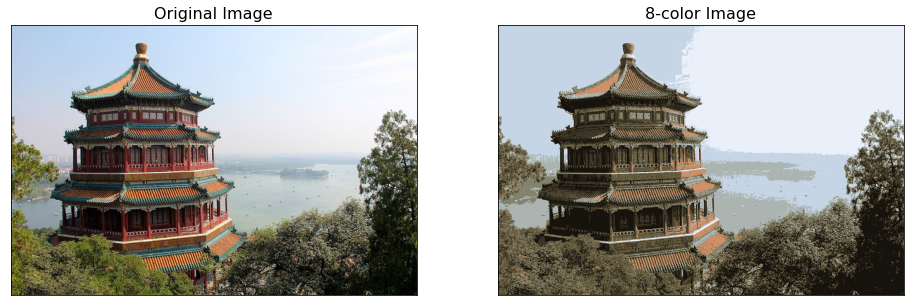

In [12]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("8-color Image", size=16);